In [74]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from IPython.display import display
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.decision_tree import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *
import spacy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from numpy import argsort
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.evaluation import *
from Functions.NLP.alertp1_nlp import *
from Functions.NLP.data_with_nlp import *
from Functions.pipeline import *
from gensim.models import Word2Vec
import re
import nltk
import gensim

In [75]:
creds = ["uktuserdaroglu","Vacy4201(Pri","172.20.20.4","hgo",3306]
#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
1180


In [76]:
alertP1 = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)

In [77]:
data= pre_process(alertP1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkuserdaroglu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utkuserdaroglu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
data.columns

Index(['ID_DOENTE', 'PROCESSO', 'COD_REFERENCIA', 'COD_PZ',
       'COD_UNID_SAUDE_PROV', 'UNID_PROV', 'TIPO_UNID', 'COD_CTH_PRIOR',
       'CTH_PRIOR', 'COD_MOTIVO_RECUSA', 'DES_MOTIVO_RECUSA',
       'COD_ESPECIALIDADE', 'DES_ESPECIALIDADE', 'agrupadora',
       'OUTRA_ENTIDADE', 'DATA_RECEPCAO', 'DATA_ENVIO', 'DATA_RETORNO',
       'NUM_TAXA', 'ESTADO', 'DATA_MARCACAO', 'DATA_REALIZACAO', 'OBSERVACOES',
       'Mês_entrada', 'Ano_entrada', 'trata data recusa', 'resume saída',
       'mês_saida', 'ano_saida', 'Texto', 'clean_text', 'result',
       'before_accepted', 'text_length', 'symptom_1', 'symptom_0',
       'exam_identified', 'comorbidity_identified', 'medication_level_1',
       'medication_level_2', 'medication_level_3', 'medication_count',
       'medication_concentration', 'count_Alteração', 'count_Agravamento',
       'count_HGO', 'count_Estável', 'outside area', 'SAM', 'SON', 'unknown',
       'Other specialities', '2', '3+', 'HOSP', 'UCSP', 'USF A', 'USF B',
       'out

In [79]:
import math

# Split data into train and test
AlertP1_sorted = data[data['Texto']!=''].sort_values(by='DATA_RECEPCAO')



# split the data frame into test and train sets
train_set = AlertP1_sorted
# Import librariers 
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings(action="ignore")
# Get rid of special characters and transform Texto column to Latin words
train_set['Texto'] = train_set['Texto'].apply(lambda x: unidecode(x))

#The re.sub function is used to substitute all digits (\d) with an empty string
train_set['Texto'] = train_set['Texto'].apply(lambda x: re.sub(r'\d', '', x))

# Remove all names in Texto variable
# This function uses a regular expression to find all words in the text that start with a 
# capital letter (\b[A-Z][a-z]+\b), which are assumed to be names
text = train_set['Texto'] 

# remove all hyphens from the text
text = text.replace('-', '')

def remove_names(text):
    # Find all words that start with a capital letter
    names = re.findall(r'\b[A-Z][a-z]+\b', text)
    
    # Replace the names with an empty string
    for name in names:
        text = text.replace(name, '')
        
    return text
# Create an empty list to store the text
text_list = []

# Loop through the 'text' column
for text in text.str.lower(): # Transform every word to lower case
    text_list.append(text)

# Print the list of text
#print(text_list)
# Download the Portuguese stop words
nltk.download('stopwords')
nltk.download('punkt')

# Get the Portuguese stop words
stop_words = set(stopwords.words('portuguese'))

# Manually remove stopwords
stop_words.update(['-//','.', ',','(',')',':','-','?','+','/',';','2','1','drª','``','','3','desde','anos','doente','consulta','alterações','se',"''",'cerca','refere','hgo','utente','vossa','s','...','ainda','c','filha','costa','dr.','pereira','ja','--','p','dr','h','n','>','q','//','..','b','++','%','//','-','+++/','=','+++/'])

# Create a new list to store the filtered text
filtered_text = []

# Loop through the text_list and remove the stop words
for text in text_list:
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    filtered_text.append(" ".join(words))

# Print the filtered text
#print(filtered_text)
# Save the filtered text as a new column to the dataframe
train_set['filtered_text'] = filtered_text
train_set.columns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkuserdaroglu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utkuserdaroglu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkuserdaroglu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utkuserdaroglu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['ID_DOENTE', 'PROCESSO', 'COD_REFERENCIA', 'COD_PZ',
       'COD_UNID_SAUDE_PROV', 'UNID_PROV', 'TIPO_UNID', 'COD_CTH_PRIOR',
       'CTH_PRIOR', 'COD_MOTIVO_RECUSA', 'DES_MOTIVO_RECUSA',
       'COD_ESPECIALIDADE', 'DES_ESPECIALIDADE', 'agrupadora',
       'OUTRA_ENTIDADE', 'DATA_RECEPCAO', 'DATA_ENVIO', 'DATA_RETORNO',
       'NUM_TAXA', 'ESTADO', 'DATA_MARCACAO', 'DATA_REALIZACAO', 'OBSERVACOES',
       'Mês_entrada', 'Ano_entrada', 'trata data recusa', 'resume saída',
       'mês_saida', 'ano_saida', 'Texto', 'clean_text', 'result',
       'before_accepted', 'text_length', 'symptom_1', 'symptom_0',
       'exam_identified', 'comorbidity_identified', 'medication_level_1',
       'medication_level_2', 'medication_level_3', 'medication_count',
       'medication_concentration', 'count_Alteração', 'count_Agravamento',
       'count_HGO', 'count_Estável', 'outside area', 'SAM', 'SON', 'unknown',
       'Other specialities', '2', '3+', 'HOSP', 'UCSP', 'USF A', 'USF B',
       'out

In [80]:
train_set.filtered_text
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 630 to 1227
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_DOENTE                 1609 non-null   object        
 1   PROCESSO                  1609 non-null   object        
 2   COD_REFERENCIA            1609 non-null   object        
 3   COD_PZ                    1609 non-null   object        
 4   COD_UNID_SAUDE_PROV       1609 non-null   int64         
 5   UNID_PROV                 1609 non-null   object        
 6   TIPO_UNID                 1609 non-null   object        
 7   COD_CTH_PRIOR             1609 non-null   object        
 8   CTH_PRIOR                 1609 non-null   object        
 9   COD_MOTIVO_RECUSA         1609 non-null   int64         
 10  DES_MOTIVO_RECUSA         1609 non-null   object        
 11  COD_ESPECIALIDADE         1609 non-null   int64         
 12  DES_ESPECIALIDADE 

In [81]:
# Define function for lemmatization
def spacy_lemmatizer(df):
    import spacy
    import pt_core_news_md
    nlp = pt_core_news_md.load()

    doclist = list(nlp.pipe(df))

    docs=[]
    for i, doc in enumerate(doclist):
        docs.append(' '.join([listitem.lemma_ for listitem in doc]))
        
    return docs

In [82]:
# create an empty list to store the words
word_list = []

# loop through each row of the "text_column" column
for index, row in train_set.iterrows():
    
    # split the text into individual words using whitespace as a delimiter
    words = row['filtered_text'].split()
    # add the words to the word list
    word_list.extend(words)

# print the word list
print(word_list)

['idade', 'tremor', 'acentuado', 'membros', 'superiores', 'agravamento', 'ultimo', 'ano', 'interferindo', 'realizacao', 'actividades', 'vida', 'diaria', 'conducao', 'filho', 'esquizofrenia', 'nao', 'consegue', 'levar', 'instituicao', 'onde', 'passava', 'dia', 'dificuldades', 'conducao', 'relatorio', 'clinico', 'traz', 'inumeros', 'relatorios', 'idas', 'hgo-su', 'vulvo-vaginites', 'durante', 'gravidez', 'relatorios', 'sobre', 'ida', 'crise', 'epilepsia', 'tendo', 'sido', 'medicada', 'depakine', 'chrono', 'enquanto', 'nao', 'completasse', 'todo', 'esclarecimento', 'situacao', 'ter', 'tido', 'crises', 'epilepticas', 'durante', 'gravidez', 'marcada', 'cons', 'neurologia', 'julho/', 'diz', 'nao', 'recebeu', 'carta', 'casa', 'tremor', 'fino', 'ambas', 'maos', 'boca', 'ha', 'meses', 'deixa', 'cair', 'objectos', 'nao', 'consegue', 'escrever', 'peco', 'cons', 'dc', 'movimento', 'pe', 'pendente', 'instalacao', 'ha', 'meses', 'atrofia', 'muscular', 'neuropatia', 'periferica', 'mononeuropatia', 'h

In [83]:
Lemma = spacy_lemmatizer(word_list) # Call lemmatizer function

# print length of word_list and compare the count after doing lemmatization
from collections import Counter

items = Counter(Lemma).keys()
print('The number of words after lemmatization:',len(items))

items2 = Counter(word_list).keys()
print('The number of words before lemmatization:',len(items2))

The number of words after lemmatization: 8948
The number of words before lemmatization: 11027


In [84]:
# apply the spacy_lemmatizer function to each row in the 'text' column
train_set['text_lemmatized'] = spacy_lemmatizer(train_set['filtered_text'])

# drop rows with empty strings
train_set_filtered = train_set[['text_lemmatized','filtered_text','result']].replace('', pd.NA).dropna()
train_set_filtered = pd.DataFrame(train_set_filtered)
train_set_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 630 to 1227
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text_lemmatized  1606 non-null   object
 1   filtered_text    1606 non-null   object
 2   result           1606 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 50.2+ KB


In [85]:
# Create a lambda function to apply to the DataFrame. I didint get the code below. 
#train_set_filtered['accepted/rejected'] = train_set_filtered['result'].apply(lambda x: 1 if x == 'Accepted' else 0)
#train_set_filtered.to_clipboard()


In [86]:
# Import Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create a TF-IDF vectorizer object with max_df = 0.8 and min_df = 5
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,min_df=5) #I removed max_df= 0.8

# Fit and transform the training data into a sparse matrix of TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(train_set_filtered['text_lemmatized'])

# Get the vocabulary
vocab = tfidf_vectorizer.get_feature_names()
print(vocab)


print(type(tfidf_vectorizer))

print(type(X_train_tfidf))
print(type(vocab))
print(tfidf_vectorizer)













# Transform the test data into a sparse matrix of TF-IDF features
#X_test_tfidf = tfidf_vectorizer.transform(train_set_filtered['filtered_text'])

# Use the TF scores for future predictions
#tf_vectorizer = TfidfVectorizer(use_idf=False, max_df=0.8, min_df=5)
#X_tf = tf_vectorizer.fit_transform(train_set_filtered['filtered_text'])

# Use the TF-IDF scores for logistic regression with other variables
#X_train_tfidf_lr = pd.concat([pd.DataFrame(X_train_tfidf.toarray()), train_set_filtered[train_set_filtered.index.isin(X_train.index)].drop(['filtered_text', 'accepted/rejected'], axis=1)], axis=1)
#X_test_tfidf_lr = pd.concat([pd.DataFrame(X_test_tfidf.toarray()), train_set_filtered[train_set_filtered.index.isin(X_test.index)].drop(['filtered_text', 'accepted/rejected'], axis=1)], axis=1)

['aas', 'abaixo', 'abandonar', 'abdominal', 'abordagem', 'abr', 'abril', 'abrir', 'abuso', 'ac', 'acabar', 'acamar', 'accao', 'aceitar', 'acentuacao', 'acentuadas', 'acentuado', 'acentuar', 'acesso', 'achado', 'achar', 'aci', 'acidente', 'acido', 'acima', 'acm', 'aco', 'acompanhamento', 'acompanhante', 'acompanhar', 'aconselhar', 'acontecer', 'acontecimento', 'acordar', 'acordo', 'acp', 'acrescer', 'actividade', 'activo', 'actual', 'actualmente', 'acufeno', 'acuidade', 'adenoma', 'adequado', 'adesao', 'adicional', 'adjacente', 'admitir', 'adolescencia', 'adormecer', 'adt', 'adulto', 'af', 'afectar', 'afundamento', 'agendar', 'agitacao', 'agitante', 'ago', 'agora', 'agosto', 'agradecar', 'agradecer', 'agradecia', 'agradeco', 'agradecor', 'agrar', 'agravamento', 'agravar', 'agressividade', 'agressivo', 'aguardar', 'agudo', 'ai', 'aine', 'ait', 'ajudar', 'ajuste', 'alargamento', 'alargar', 'alcool', 'alcoolico', 'alcoolismo', 'aler', 'alergia', 'alergicar', 'alert', 'alertr', 'algico', 'a

In [87]:
print(X_train_tfidf.nnz)
X_train_tfidf.shape

50045


(1606, 2058)

In [88]:
#WORD2VEC

In [89]:

# Train a word2vec model on the tokenized text
sentences = [doc.split() for doc in train_set_filtered['text_lemmatized']]

model = Word2Vec(sentences, min_count=2, window=3,workers=3)

# Get the word vectors
word_vectors = model.wv





In [90]:
# Calculate the weighted average vectors for each referral
referral_vectors = []
for i in range(X_train_tfidf.shape[0]):
    # Get the non-zero indices and values in the row
    row = X_train_tfidf.getrow(i)
    non_zero_indices = row.indices
    non_zero_values = row.data

    # Check if the row contains any non-zero values
    if len(non_zero_indices) > 0:
        # Get the word vectors for the non-zero indices
        word_vectors_for_referral = []
        for index, value in zip(non_zero_indices, non_zero_values):
            word = vocab[index]
            try:
                word_vector = word_vectors[word]
                word_vectors_for_referral.append(word_vector * value)
            except KeyError:
                pass

        # Calculate the average vector for the referral
        referral_vector = np.sum(word_vectors_for_referral, axis=0) / np.sum(non_zero_values)
        referral_vectors.append(referral_vector)
    else:
        # If the row contains all zeros, create a zero vector
        referral_vectors.append(np.zeros(model.vector_size))

# Assign the referral vectors to a new column in the dataframe
train_set_filtered['Referral_Vectors'] = referral_vectors


In [91]:
len(referral_vectors)

1606

In [92]:
train_set_filtered.to_clipboard()

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set_filtered['Referral_Vectors'], train_set_filtered['result'], test_size=0.2, random_state=42)

# Convert the referral vectors to a 2D numpy array
X_train = np.vstack(X_train.values)
X_test = np.vstack(X_test.values)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))


Accuracy: 77.95%
Precision: 82.73%
Recall: 77.95%
F1 score: 74.38%


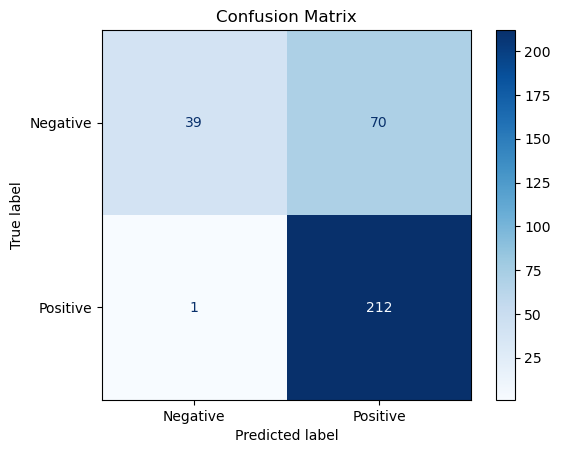

In [94]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=["Negative", "Positive"],
                             cmap=plt.cm.Blues,
                             normalize=None)

# Set the title of the plot
disp.ax_.set_title("Confusion Matrix")

# Show the plot
plt.show()



In [95]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set_filtered['Referral_Vectors'], train_set_filtered['result'], test_size=0.2, random_state=42)

# Convert the referral vectors to a 2D numpy array
X_train = np.vstack(X_train.values)
X_test = np.vstack(X_test.values)

# Train an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))


Accuracy: 74.53%
Precision: 73.66%
Recall: 74.53%
F1 score: 73.01%


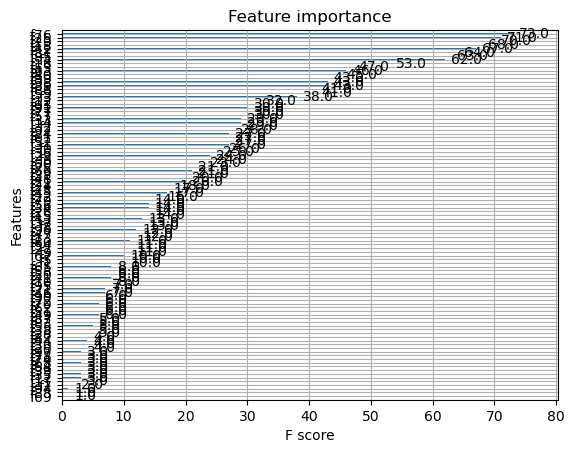